# Predicting Credict Risk

## Libraries

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


### Load Training Data and Processing

In [2]:
file = ('Resources/2019loans.csv')
train_df = pd.read_csv(file)
train_df.head(5)

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In order to successfully access wheather a credit is affordable or not, we look at the associated risk attached. Therefore in this homework we use the loan_status as a guiding tool. That is to say our label or target is the loan_status.

In [3]:
# drop irrelevant data
train_df = train_df.drop(['index', 'Unnamed: 0'], axis=1)

In [4]:
# dropping y label
X_train_df = train_df.drop('loan_status', axis=1)
X_train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,n,29.99,0.0,0.0,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,n,11.26,2.0,0.0,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,n,11.28,0.0,0.0,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,n,18.08,0.0,0.0,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,n,27.77,0.0,2.0,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [5]:
X_train_df.shape

(12180, 83)

In [6]:
X_train_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.000000,...,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.0,1.218000e+04,12180.000000,12180.000000,1.218000e+04
mean,17399.579228,0.140899,509.150241,8.989320e+04,22.589516,0.256979,0.566502,12.680296,0.11601,17593.681773,...,0.063300,2.362890,94.510148,33.054130,0.11601,0.0,1.989801e+05,62404.817980,28038.013136,5.622215e+04
std,10238.160884,0.052679,294.617726,1.684370e+05,23.903223,0.803027,0.814674,6.154663,0.32960,22602.217861,...,0.425228,1.987853,8.889650,33.889522,0.32960,0.0,1.923892e+05,58987.382738,25331.908015,5.207485e+04
min,1000.000000,0.060000,30.890000,5.000000e+02,0.100000,0.000000,0.000000,2.000000,0.00000,0.000000,...,0.000000,0.000000,22.200000,0.000000,0.00000,0.0,3.300000e+03,1275.000000,200.000000,1.270000e+02
25%,10000.000000,0.103300,286.902500,5.000000e+04,14.500000,0.000000,0.000000,8.000000,0.00000,6306.000000,...,0.000000,1.000000,92.300000,0.000000,0.00000,0.0,6.260000e+04,26863.500000,10800.000000,2.329875e+04
50%,15000.000000,0.130800,438.530000,7.300000e+04,20.375000,0.000000,0.000000,11.000000,0.00000,11971.500000,...,0.000000,2.000000,100.000000,25.000000,0.00000,0.0,1.281345e+05,46287.000000,20700.000000,4.264450e+04
75%,25000.000000,0.177400,682.230000,1.035850e+05,27.290000,0.000000,1.000000,16.000000,0.00000,21500.250000,...,0.000000,3.000000,100.000000,54.500000,0.00000,0.0,2.854070e+05,77730.000000,36900.000000,7.313275e+04
max,40000.000000,0.308400,1671.880000,9.682505e+06,999.000000,15.000000,5.000000,65.000000,4.00000,506260.000000,...,15.000000,20.000000,100.000000,100.000000,4.00000,0.0,3.137619e+06,917986.000000,284800.000000,1.319104e+06


In [7]:
X_train_df.isnull().sum()

loan_amnt                     0
int_rate                      0
installment                   0
home_ownership                0
annual_inc                    0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
debt_settlement_flag          0
Length: 83, dtype: int64

In [8]:
X_train_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12175    False
12176    False
12177    False
12178    False
12179    False
Length: 12180, dtype: bool

### Loading Test Data

In [9]:
file2 = ('Resources/2020Q1loans.csv')
test_df = pd.read_csv(file2)
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [10]:
X_test_df = test_df.drop(['index', 'Unnamed: 0'], axis=1)


In [11]:
X_test_df = test_df.drop(['index', 'Unnamed: 0'], axis=1)
X_test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [12]:
# drop labels
X_test_df = X_test_df.drop('loan_status', axis=1)
X_test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,n,19.75,0.0,1.0,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,n,11.52,2.0,0.0,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,n,6.74,0.0,0.0,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,n,12.13,0.0,2.0,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,n,16.08,0.0,3.0,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [13]:
X_test_df.isnull().sum()

loan_amnt                     0
int_rate                      0
installment                   0
home_ownership                0
annual_inc                    0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
debt_settlement_flag          0
Length: 83, dtype: int64

In [14]:
X_test_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4697    False
4698    False
4699    False
4700    False
4701    False
Length: 4702, dtype: bool

In [15]:
# assign labels denoted by y to our train and test data sets
y_train_label = LabelEncoder().fit_transform(train_df["loan_status"])
y_test_label = LabelEncoder().fit_transform(test_df["loan_status"])


The get_dummies() function from the Pandas library is adopted in order to convert all categorical variables into dummy/indicator variables. This is to help encode its behaviour

In [16]:
# get_dummies for train data
X_train_conv = pd.get_dummies(X_train_df)
X_train_conv.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0,1,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0,1,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0,1,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,1,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0,1,0,1,1,0,1,0,1,0


In [17]:
# get_dummies for test data
X_test_conv = pd.get_dummies(X_test_df)
X_test_conv.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,0,1,0,1,1,0,1,0,1
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,0,1,0,1,1,0,1,0,1
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,0,1,0,1,1,0,1,0,1
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,0,1,0,1,1,0,1,0,1
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,0,1,0,1,1,0,1,0,1


In [18]:
print(X_train_conv.shape)
print(X_test_conv.shape)

(12180, 92)
(4702, 91)


From the above cell we notice that the shape of the train set is different from the test set and we all an extra column and fill with zero

In [19]:
cols = X_train_conv.columns.tolist()
X_test_conv = X_test_conv.reindex(columns=cols).fillna(0)
X_test_conv.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,1,0,1,1,0,1,0,1,0.0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,1,0,1,1,0,1,0,1,0.0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,1,0,1,1,0,1,0,1,0.0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,1,0,1,1,0,1,0,1,0.0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,1,0,1,1,0,1,0,1,0.0


In [20]:
X_train_conv.shape


(12180, 92)

In [21]:
y_train_label.shape

(12180,)

In [22]:
y_train_label[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

###### Educational guess Unscaled Data
From the data provided, I expect to see the RandomForest Classifier perform better than the LogisticRegression model. The reason being that, RandomForest model operates by constructing a multiple of decisions during training time whilst the Logistic Regression focus on the probability of matching discrete classes based on the sigmoid function.

## LogisticRegression model Unscaled

In [23]:
classifier = LogisticRegression(fit_intercept=True, random_state=1,verbose=0)

In [24]:
classifier.fit(X_train_conv,y_train_label)

C:\Users\User\anaconda38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [25]:
classifier.score(X_test_conv,y_test_label)

0.5165886856656742

In [26]:
print(f"Training Data Score: {classifier.score(X_train_conv,y_train_label)}")
print(f"Test Data Score: {classifier.score(X_test_conv,y_test_label)}")

Training Data Score: 0.6504105090311987
Test Data Score: 0.5165886856656742


## RandomForestClassifier model unscaled

In [27]:
model_r =RandomForestClassifier(n_estimators = 20, max_features='auto')

In [28]:
model_r.fit(X_train_conv,y_train_label)

RandomForestClassifier(n_estimators=20)

In [29]:
model_r.score(X_train_conv,y_train_label)

0.9986042692939244

In [30]:
model_r.score(X_test_conv,y_test_label)

0.6227137388345385

In [31]:
y_predicted = model_r.predict(X_test_conv)
y_predicted

array([0, 1, 1, ..., 0, 1, 0])

In [32]:
# Optional : using confusion matrix to confirm RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_label, y_predicted )
cm

array([[1939,  412],
       [1362,  989]], dtype=int64)

Text(69.0, 0.5, 'Truth')

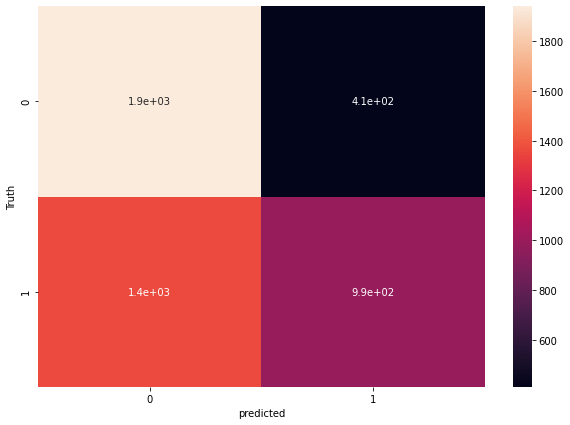

In [33]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [34]:
y_true = y_test_label
tn, fp, fn, tp = confusion_matrix(y_true, y_predicted).ravel()

accuracy = (tp + tn) / (tp + fp + tn + fn)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6227137388345385


In [35]:
print(metrics.classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       0.59      0.82      0.69      2351
           1       0.71      0.42      0.53      2351

    accuracy                           0.62      4702
   macro avg       0.65      0.62      0.61      4702
weighted avg       0.65      0.62      0.61      4702



### Summary Unscalled Data

In [36]:

Summary_unscaled = [
  {"model": "LogisticRegression","Training score":0.650, "Test score":0.516},
{"model": "RandomForest","Training score":0.998, "Test score":0.585}]


In [37]:
pd.DataFrame.from_dict(Summary_unscaled, orient='columns')

,model,Training score,Test score
0,LogisticRegression,0.650,0.516
1,RandomForest,0.998,0.585


###### In summary, from the table above, the RandomForest model performed far better on the train set as compared with the LogisticRegression. However, to test the reliability of a model, it should be able to perform well on its test data. In this case that is not seen. Hence, with the close nature of the test score, the LogisticRegression gives a better prediction.

###### Educational guess scaled Data
From the summary results on the unscalled data, I expect to see the LogisticRegression model perform better on both fronts.

# Alternative : Using Standard Scaler

### Logistic Regression Model

In [38]:
# scaling the data by using Standard Scaler()
scaler = StandardScaler().fit(X_train_conv)
X_train_scaled = scaler.transform(X_train_conv)
X_train_scaled

array([[-0.39311205,  0.73658452, -0.08760946, ..., -0.17149859,
         0.02026518, -0.02026518],
       [ 0.35168119, -0.19171582, -0.10342722, ..., -0.17149859,
         0.02026518, -0.02026518],
       [ 0.25400339, -0.32080462, -0.20434179, ..., -0.17149859,
         0.02026518, -0.02026518],
       ...,
       [-1.34791257,  0.85997823, -1.28263075, ..., -0.17149859,
         0.02026518, -0.02026518],
       [-0.23438563, -1.00231755, -0.11361032, ..., -0.17149859,
         0.02026518, -0.02026518],
       [-0.23438563,  0.69292214,  0.10586953, ..., -0.17149859,
         0.02026518, -0.02026518]])

In [39]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test_conv)
X_test_scaled

array([[ 2.20755943, -1.12001617,  1.0371484 , ..., -0.17149859,
         0.02026518, -0.02026518],
       [-1.11348584,  0.21833096, -1.01983876, ..., -0.17149859,
         0.02026518, -0.02026518],
       [-1.34791257,  0.54295132, -1.2928478 , ..., -0.17149859,
         0.02026518, -0.02026518],
       ...,
       [-0.72277464,  1.7009538 , -0.41340093, ..., -0.17149859,
         0.02026518, -0.02026518],
       [-0.91813024,  0.85997823, -1.02947877, ..., -0.17149859,
         0.02026518, -0.02026518],
       [ 1.23078141,  1.22636262,  2.08478621, ..., -0.17149859,
         0.02026518, -0.02026518]])

In [40]:
classifier = LogisticRegression(fit_intercept=True, random_state=1, max_iter = 400,verbose=0, multi_class='auto')

In [41]:
classifier.fit(X_train_scaled,y_train_label)

LogisticRegression(max_iter=400, random_state=1)

In [42]:
classifier.score(X_train_scaled,y_train_label)

0.7080459770114943

In [43]:
classifier.score(X_test_scaled,y_test_label)

0.7679710761378137

In [44]:
print(f"Training Scaled Data Score: {classifier.score(X_train_scaled,y_train_label)}")
print(f"Test  Scaled Data Score: {classifier.score(X_test_scaled,y_test_label)}")

Training Scaled Data Score: 0.7080459770114943
Test  Scaled Data Score: 0.7679710761378137


### RandomForest Model

In [45]:
classifier_r =RandomForestClassifier(n_estimators = 20, max_features='auto')

In [46]:
classifier_r.fit(X_train_scaled,y_train_label)

RandomForestClassifier(n_estimators=20)

In [47]:
classifier_r.score(X_test_scaled,y_test_label)

0.5984687367077839

In [48]:
print(f"Training Scaled Data Score: {classifier_r.score(X_train_scaled,y_train_label)}")
print(f"Test  Scaled Data Score: {classifier_r.score(X_test_scaled,y_test_label)}")

Training Scaled Data Score: 0.9979474548440066
Test  Scaled Data Score: 0.5984687367077839


In [49]:
Summary_scaled = [
  {"model": "LogisticRegression","Training score":0.701, "Test score":0.768},
{"model": "RandomForest","Training score":0.998, "Test score":0.5708}]

In [50]:
pd.DataFrame.from_dict(Summary_scaled, orient='columns')

,model,Training score,Test score
0,LogisticRegression,0.701,0.7680
1,RandomForest,0.998,0.5708


### Summary Scaled Data
The table above shows a similar trend in the training dataset with the RandomForest performing very well, but we see a good prediction on the training set for LogisticRegression model, which shows that data scalling is very important. Obviously, the LinearRegresssion model was able to perform well and better in this study.